# FIT5201 - Assignment 1

## KNN regressor

#### For the first question of the assignment, we are required to implement a KNN regressor function which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (K). It should return the regressed values for the test data points. Added on, we are required to plot training and testing errors versus 1/k, with which we need to devise which is the optimum value of k in terms of testing error.

#### KNN is a non parametric method used for both classification and regression. For regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

#### We first begin by loading the data 

In [3]:
library(ggplot2)
library(tidyverse)
library(reshape2)

Warning message:
"package 'ggplot2' was built under R version 3.6.1"Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v dplyr   0.8.3
v readr   1.3.1     v stringr 1.4.0
v tibble  2.1.1     v forcats 0.4.0
Warning message:
"package 'dplyr' was built under R version 3.6.1"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'reshape2' was built under R version 3.6.1"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



#### We separate the data into training data/labels and testing data/labels.

In [13]:
data <- read.csv('Task1A_train.csv')
data_test <- read.csv('Task1A_test.csv')
training_data <- data['x1']
training_label <- data['y']
test_data <- data_test['x1']
test_label <- data_test['y']

The following function implements the KNN function. We pass training data, training labels, test data, the number of neighbors(k) and the distance method(Euclidean for our scenario). The function does the following steps,
- Calculates distance between samples
- For each test sample, get the average of the test labels of 'k' nearest neighbors of the test data point.
- Return the test label

In [17]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
  ## count number of train samples
  train.len <- nrow(train.data)
  
  ## count number of test samples
  test.len <- nrow(test.data)
  
  ## calculate distances between samples
  dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
  
  ## for each test sample...
  test.label<- c()
  for (i in 1:test.len){
    ### ...find its K nearest neighbours from training sampels...
    nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
    
    ###... and calculate the predicted labels according to the majority vote
    test.label[i]<- (mean(train.label[nn,1]))
  }
  
  ## return the class labels as output
  return (test.label)
}


The below codes stores a dataframe for training and testing error of KNN regressor for different values of k. We use RMSE for calculating these errors by using the below formula,
                            $$RMSE=\sqrt{\frac{\sum_{i=1}^N (Predicted-  Actual)^2}{N}}$$


In [28]:
miss <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    miss[k,'train'] <- sqrt(sum((training_label - knn(training_data, training_label, training_data, K=k))**2)/nrow(training_data))
    miss[k,'test'] <-  sqrt(sum((test_label - knn(training_data, training_label, test_data, K=k))**2)/nrow(test_data))
}

Below, we code a plot for training v/v test error for different values of k.

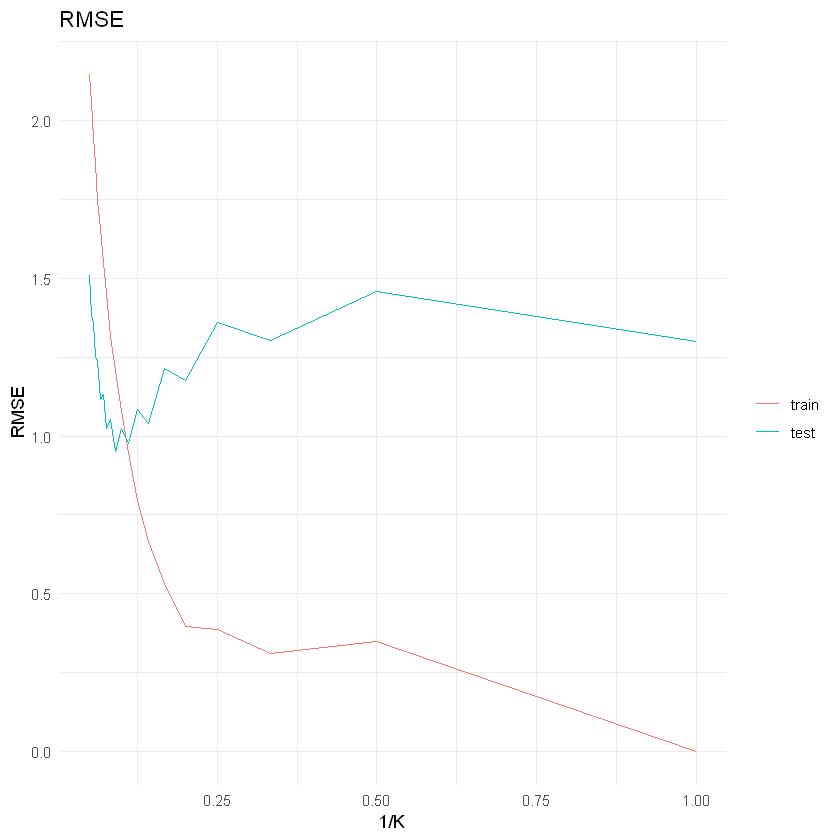

In [29]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'RMSE')
ggplot(data=miss.m, aes(x=1/K, y=RMSE, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("RMSE")

We can interpret the following things from the above plot,
- When k=1, the bias becomes 0, but when we introduce a new data point to the model, it has higher chance to have an error due to high variance due to a non smooth decision surface. Thus, we get a very low training error and a high test error as the model completely overfits on the training data. This is a case of overfitting the model.
- As k increases we increase the bias of the model and decrease the variance, which smooths the decision surface of our model to a certain threshold. After which we increase our k, the decision becomes very smooth and every prediction from the regressor will have a single value which leads to model underfitting.
- The optimal value of K is somewhere around 8-10, as we can see from the plot, it's where the training and testing errors converges to a minimum. This region has the perfect trade off with the bias and variance of the model.